## Add imports

In [51]:
# import os
import sys
import importlib
sys.path.append("/tmp/pycharm_project_568/Classification/")
# # from dataset_tool.dataset_loader import *
# import importer
# from dataset_tool.dataset_loader import *
import dataset_tool.dataset_loader
importlib.reload(dataset_tool.dataset_loader)

<module 'dataset_tool.dataset_loader' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_loader.py'>

### Load dataset

In [52]:
dataset = dataset_tool.dataset_loader.load_dataset5()

test
Shape of array is (6966,)
COnfig path /tmp/pycharm_project_568/Classification/dataset_config
to_learch field,forest,water,city
Processing field
Size of field is 982700
Processing forest
Size of forest is 456100
Processing water
Size of water is 155000
Processing city
Size of city is 49600
Train size: 1314720. Test size: 328680


### Transform to binary tree

In [53]:
from dataset_tool.dataset_tree_transformer import *
importlib.reload(dataset_tool.dataset_tree_transformer)


<module 'dataset_tool.dataset_tree_transformer' from '/tmp/pycharm_project_568/Classification/dataset_tool/dataset_tree_transformer.py'>

In [54]:
dataset_tree = DatasetTreeAdapter(dataset)

COnfig path /tmp/pycharm_project_568/Classification/dataset_config
categories tree string ["field",["forest",["water","city"]]]
List array ['field', ['forest', ['water', 'city']]].
Creating dataset: train len: 1314720 test len: 328680
Creating dataset: train len: 528347 test len: 132353
Creating dataset: train len: 163462 test len: 41138


In [55]:
dataset_tree.dataset_tree

In [56]:
#importlib.reload(dataset_tool.KNNClassifier)
from dataset_tool.KNNClassifier import *





### Use KNN-C

#### Model fit

In [57]:
knn_classifier = KNNClassifier(dataset_tree.dataset_tree)

In [58]:
knn_classifier.fit()

Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]


In [59]:
knn_classifier.predict_test()

Start prediction test data:
Models [KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]
Working with: idx 0 and shape (328680, 12)...
Working with: idx 1 and shape (132353, 12)...
Working with: idx 2 and shape (41138, 12)...


#### Get classification report

In [60]:
import cuml
type(knn_classifier.models[0]) == cuml.internals.base_helpers.BaseMetaClass

False

In [61]:
from dataset_tool.classification_report_creator import *

In [62]:
knn_report_creator = ClassificationReportCreator(knn_classifier.predictions,dataset_tree.dataset_tree)

In [63]:
knn_report_creator.display_tree_predictions()

Get accureacy for 0 iteration
Accureacy 0.9588688015937805
              precision    recall  f1-score   support

           1       0.98      0.96      0.97    200366
           2       0.93      0.96      0.95    128314

    accuracy                           0.96    328680
   macro avg       0.95      0.96      0.96    328680
weighted avg       0.96      0.96      0.96    328680

Get accureacy for 1 iteration
Accureacy 0.9818666577339172
              precision    recall  f1-score   support

           1       0.99      0.98      0.99     92355
           2       0.96      0.98      0.97     39998

    accuracy                           0.98    132353
   macro avg       0.98      0.98      0.98    132353
weighted avg       0.98      0.98      0.98    132353

Get accureacy for 2 iteration
Accureacy 0.9957946538925171
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     31155
           2       0.99      0.99      0.99      9983

    a

In [64]:
import numpy as np
arrr = np.asarray([1,2,3,4,5,6])

In [65]:
np.delete(arrr,[0,3,5])

array([2, 3, 5])

### Gaussian naive Bayes

#### GNB fit

In [66]:
from dataset_tool.NBClassifier import *

In [67]:
gnb_classifier = GaussianNBClassiefier(dataset_tree.dataset_tree)

In [68]:
gnb_classifier.fit()

Models [GaussianNB(), GaussianNB(), GaussianNB()]


In [69]:
gnb_classifier.predict_test()

Start prediction test data:
Models [GaussianNB(), GaussianNB(), GaussianNB()]
Working with: idx 0 and shape (328680, 12)...
Working with: idx 1 and shape (132353, 12)...
Working with: idx 2 and shape (41138, 12)...


### SVM fit

In [70]:
from dataset_tool.SVMClassifier import *

In [71]:
svm_classifier = SVMClassiefier(dataset_tree.dataset_tree)

In [72]:
#svm_classifier.fit()

In [73]:
#from dataset_tool.KNNCTF import *

In [74]:
#tf_knnc =

## Predict on test image

In [75]:
from dataset_tool.real_prediction import *
#importlib.reload(dataset_tool.real_prediction)

In [76]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [77]:
real_prediction_knn = RealPrediction("/tmp/shared/dataset4/2", knn_classifier.models)

In [78]:
real_prediction_gnb = RealPrediction("/tmp/shared/dataset4/2", gnb_classifier.models)

In [79]:
real_prediction_svc = RealPrediction("/tmp/shared/dataset4/2", svm_classifier.models)

In [80]:
knn_classifier.models

[KNeighborsClassifier(), KNeighborsClassifier(), KNeighborsClassifier()]

In [81]:
real_prediction_knn.predict()

In [82]:
real_prediction_gnb.predict()

In [83]:
real_prediction_svc.predict()

In [84]:
real_prediction_knn

In [85]:
real_prediction_knn.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (125995,)
Predcition: 1. Len of idxs: 249976. New array shape: (375971,)
Predcition: 0. Len of idxs: 322001. New array shape: (697972,)


In [86]:
real_prediction_gnb.flatten()

Predcition: 2. Len of idxs: 0. New array shape: (93609,)
Predcition: 1. Len of idxs: 79602. New array shape: (173211,)
Predcition: 0. Len of idxs: 524761. New array shape: (697972,)


In [87]:
real_prediction_svc.flatten()

In [88]:
im = real_prediction_knn.to2d()

In [89]:
im_gnb = real_prediction_gnb.to2d()

In [90]:
im_svc = real_prediction_svc.to2d()

ValueError: cannot reshape array of size 0 into shape (638,1094)

In [ ]:
real_prediction_knn.height

In [ ]:
# arr1 = np.asarray([1,2,3])
# arr1_idx = np.asarray([2,4,5])
# arr2 = np.asarray([11,22,33,44,55,66,77,88])
# shapes = arr1.shape[0]+arr2.shape[0]
# arr3 = np.empty(shapes, dtype=float)
# arr3[arr1_idx] = arr1
# arr3[~np.isin(np.arange(arr3.shape[0]), arr1_idx)] = arr2
# arr3

In [ ]:
predictions = real_prediction_knn.predictions

In [ ]:
len(predictions[2][0])

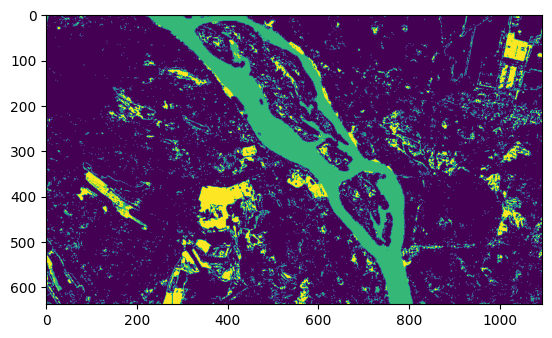

In [91]:
import matplotlib.pyplot as plt

plt.imshow(im)

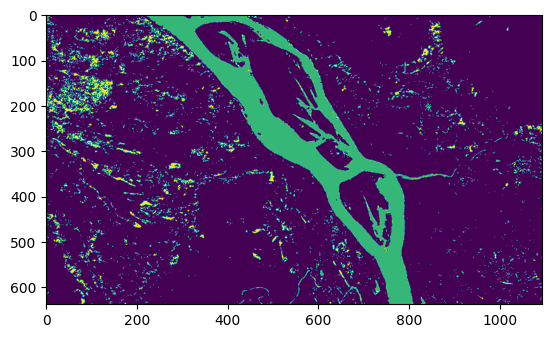

In [92]:
plt.imshow(im_gnb)

In [93]:
plt.imshow(im_svc)

NameError: name 'im_svc' is not defined

In [ ]:
real_prediction_knn.predict_proba()

In [ ]:
#real_prediction_knn.flatten_proba()

In [ ]:
real_prediction_knn.predictions[0][1][0]

In [ ]:
real_prediction_knn.predictions_proba[0][1]

In [ ]:
# def flatten_proba(self):
#     array = np.empty(0)
#     for index, item in reversed(list(enumerate(self.predictions_proba))):
#         new_array = np.empty((array.shape[0] + item[1].shape[0],2), dtype=float)
#         print(f"Predcition: {item[2]}. Len of idxs: {len(item[0])}. New array shape: {new_array.shape}")
#         new_items = item[1] + item[2]
#         if len(item[0]) == 0:
#             new_array[np.arange(item[1].shape[0])] = new_items
#         else:
#             new_array[item[0]] = item[1]
#             new_array[~np.isin(np.arange(array.shape[0] + item[1].shape[0]), item[0])] = array
#         array = new_array
#     self.predictions_composite_proba = array

In [ ]:
import numpy as np

item1 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])
item2 = np.asarray([[0.2,0.8],[0.3,0.7],[0.2,0.8],[0.4,0.6],[0.25,0.75]])

In [ ]:
# item1_1 = item1[0]
# item2_1 = item2[0]

In [ ]:
# item3 = item1[0][2] * item2_1

In [ ]:
result = item1 * item2[:, 0][:, np.newaxis]

In [ ]:
result

In [ ]:
result = np.hstack((item1, result, result * item2[:, 1][:, np.newaxis]))

In [ ]:
result

In [ ]:
result2 = np.hstack((item1, (item1 * item2).sum(axis=1, keepdims=True)))

In [ ]:
result2

In [ ]:
item1[0][1]*item2[0]

In [ ]:
item1[0][1]

In [ ]:
item2[0]

In [ ]:
i1 = item1[:,1][:,np.newaxis] * item2

In [ ]:
i2 = item1[:,0]

In [ ]:
np.zstack(i2,i1)

In [ ]:
i1.shape

In [ ]:
i2.shape

In [ ]:
np.hstack((i2[:, np.newaxis], i1))

In [ ]:
probas = np.asarray(real_prediction_knn.predictions_proba)

In [ ]:
probas.shape

In [ ]:
# def flatten_probas():
#     new_array = np.empty(0)
#
#     for idx, item in enumerate(probas):
#         print(f"idx: {idx}")
#         if idx == 0:
#             new_array = item
#         else:
#             i1 = new_array[:, idx][:,np.newaxis] * item
#             i2 = new_array[:,:idx]
#             new_array = np.hstack((i2, i1))
#
#     return new_array

In [ ]:
# arrrrr = flatten_probas()

In [ ]:
# arrrrr.shape

In [ ]:
# from dataset_tool.graph_utils import *
#
# createHistGraph(arrrrr, dataset.categories_map)

In [ ]:
i2 = arrrrr[:, :1]

In [ ]:
i1.shape

In [ ]:
np.hstack((i2,i1))

In [ ]:
probas[1]